In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

%matplotlib inline

# iris (붓꽃) 데이터셋 불러오기
iris = datasets.load_iris()

# iris 데이터셋 표로 만들기
pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



<img src = "https://drive.google.com/uc?id=1QUPcC4E-QBJ4CCvUYzUa6_o7agUtiuHe" height = 300 width = 900>

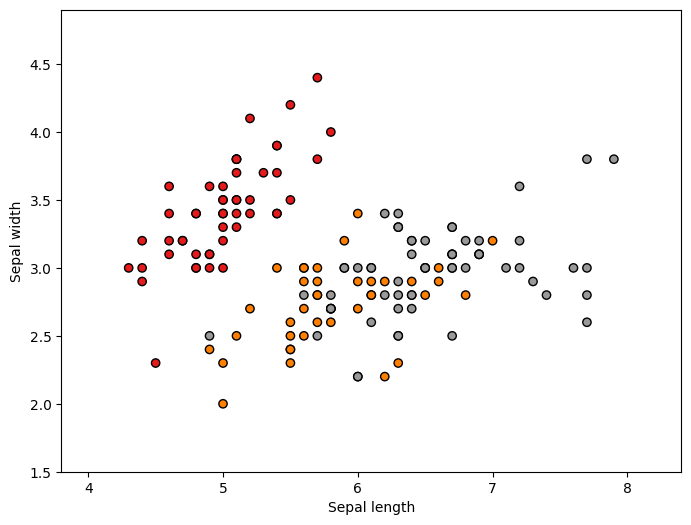

In [ ]:
# sepal length, width 가져와서 붓꽃 종류 예측하기
X = iris.data[:, :2]
y = iris.target

# visualization을 위하여 lim 설정
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# 데이터 포인트 시각화하기
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

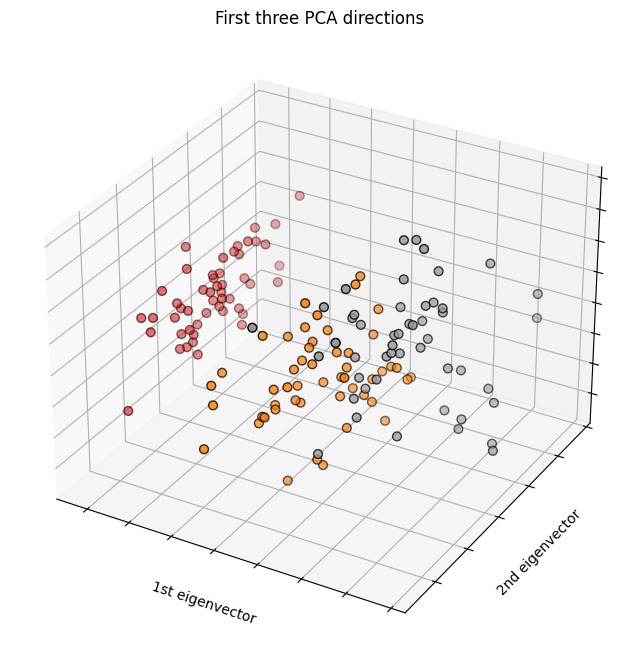

In [ ]:
# PCA 분석 후 3D 공간에 뿌리기

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(projection='3d')
X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
# 필요한 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# train / test 데이터셋 분리하기
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [ ]:
# classifier 객체 만들고 학습시키기
n_neighbors=15
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(x_train, y_train)

# 예측
prediction = clf.predict(x_test)
cv_score = cross_val_score(clf, x_train, y_train, cv=10)  # train 세트를 10개로 분리한 다음 얻은 성능

print("clf.score             : {0:.3f}".format(clf.score(x_train, y_train)))
print("(pred == y_test) score: {0:.3f}".format((prediction==y_test).mean()))
print("cross_val_score       : {0:.3f}".format(cv_score.mean()))

clf.score             : 0.812
(pred == y_test) score: 0.789
cross_val_score       : 0.777


In [ ]:
# 실제값
print(y_test)

# 예측값
print(prediction)

# validation 성능값
print(cv_score)

[0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 1 2 0 0 0 2 2 1 2 0 1 2 1 2 2 2 2 1
 2]
[0 0 0 1 1 1 1 1 2 2 0 1 1 1 0 1 0 0 0 1 2 0 0 0 2 2 1 2 0 2 2 1 1 1 2 2 1
 2]
[0.83333333 0.75       0.90909091 0.72727273 0.54545455 0.81818182
 0.81818182 0.63636364 0.90909091 0.81818182]


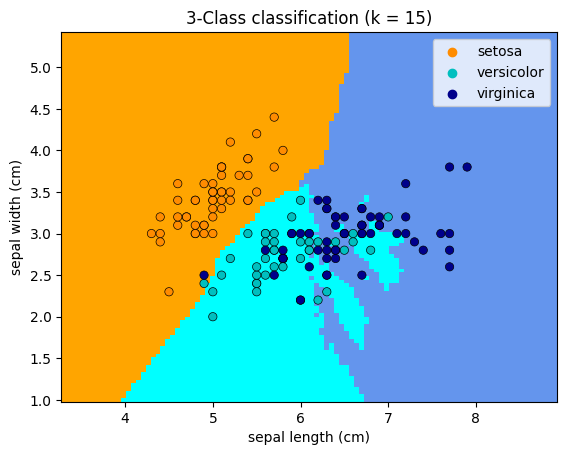

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]


_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)

plt.show()

In [ ]:
# n_neighbors를 1~14까지 적용

train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

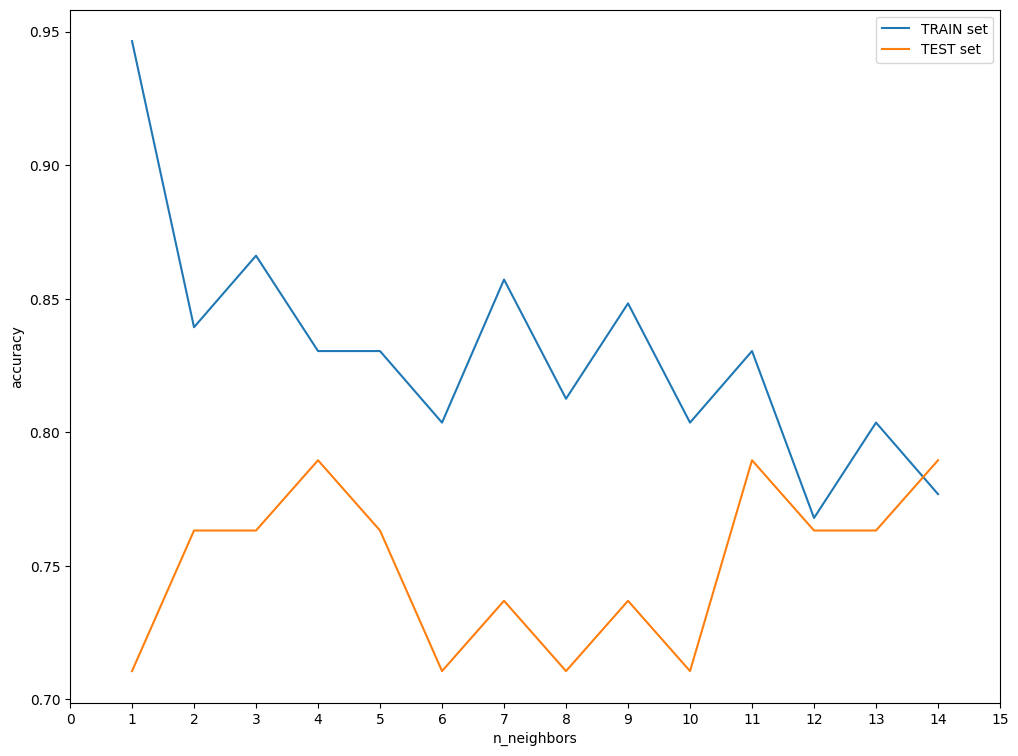

In [ ]:
# n_neighbors의 변화에 따른 성능 시각화

plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [ ]:
# Naive Bayes model

weather=['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
temp=['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
play=['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
# LabelEncoder 가져오기
from sklearn import preprocessing

# LabelEncoder 객체 만들기
le = preprocessing.LabelEncoder()

# 데이터를 숫자로 변환하기
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

In [ ]:
# 숫자로 변환한 날씨/온도 데이터 묶기
features = zip(weather_encoded, temp_encoded)
features = list(features)

# Naive Bayes model 가져오기
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model으로 예측하기
model = GaussianNB()
model.fit(features,label)
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild

# 예측결과 출력
print(model.predict(features))

# 임의로 데이터 넣어보기
print(predicted)

[0 0 1 1 1 1 1 0 0 1 0 1 1 1]
[1]


In [ ]:
# 와인 데이터셋

from sklearn import datasets
wine = datasets.load_wine()

# 13 features 출력하기
print("Features: ", wine.feature_names)

# 와인 종류 정의(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

# Naive Bayes model으로 예측하기
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [ ]:
# 라이브러리 및 패키지 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


# 유방암 데이터 불러오기
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df = df.iloc[:, :10]
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

# 확인
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0


### 이 데이터셋은 환자들의 종양에 대해서 아래와 같은 정보를 담고 있습니다.
##### 원본 데이터는 평균, 표준오차, 큰 값 3개의 평균을 담고있지만 여기에서는 평균만 다루겠습니다.

* radius
* texture
* perimeter
* area
* smoothness
* compactness
* concavity
* concave_points
* symmetry
* fractal_dimension

In [ ]:
from sklearn.model_selection import train_test_split

# Step1) train / test 으로 나누기
train, test = train_test_split(df, test_size=0.15, random_state=1)

# Step2) train을 다시 train/validation 으로 나누기
train, val = train_test_split(train, test_size = 0.18, random_state=1)

# 확인
train.shape, val.shape, test.shape

((396, 11), (87, 11), (86, 11))

In [ ]:
# feature/taraget 설정
feature = ["mean_texture", "mean_smoothness", "mean_symmetry", "mean_fractal_dimension", "mean_area", "mean_concave_points"]
target = "label"

# train 데이터셋
X_train = train[feature]
y_train = train[target]

# validation 데이터셋
X_val = val[feature]
y_val = val[target]

# test 데이터셋
X_test = test[feature]
y_test = test[target]

# 확인
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (396, 6) (87, 6) (86, 6)
target vector:  (396,) (87,) (86,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성
scaler = StandardScaler()

# 스케일 조정하기
X_train_sclaed = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 일부만 확인
X_train_sclaed.T[0].mean(), X_train_sclaed.std()

(1.4802973661668753e-16, 1.0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 시키기
logistic = LogisticRegression()
logistic.fit(X_train_sclaed, y_train)

# 결과 확인
print("validation 데이터셋 정확도")
logistic.score(X_val_scaled, y_val)

validation 데이터셋 정확도


0.9425287356321839

In [ ]:
# train 데이터셋과 validation 데이터셋 합치기
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

# feature/taraget 설정
feature = ["mean_texture", "mean_smoothness", "mean_symmetry", "mean_fractal_dimension", "mean_radius", "mean_concave_points"]
target = "label"

# 스케일러 생성
scaler = StandardScaler()

# 스케일 조정
X_total_sclaed = scaler.fit_transform(X_total)
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 학습 시키기
model = LogisticRegression()
model.fit(X_total_sclaed, y_total)

# 결과 확인
print("test 데이터셋 정확도")
model.score(X_test_scaled, y_test)

test 데이터셋 정확도


0.9651162790697675